In [15]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('../data/sotnikov.ad_hw6.csv')

In [17]:
data.head()

,f,c1,c2
0,0.360473,5.0,2.0
1,1.708545,5.0,2.0
2,2.128410,1.0,4.0
3,1.048427,5.0,2.0
4,0.387116,5.0,4.0


In [18]:
data.shape

(1000, 3)

In [19]:
data.describe()

,f,c1,c2
count,1000.000000,1000.000000,1000.000000
mean,0.996024,3.012000,2.992000
std,1.203675,2.000965,1.000468
min,-2.422091,1.000000,2.000000
25%,0.176813,1.000000,2.000000
50%,1.007200,5.000000,2.000000
75%,1.836232,5.000000,4.000000
max,4.625932,5.000000,4.000000


In [20]:
x = data.to_numpy()

In [21]:
x

array([[0.36047346, 5.        , 2.        ],
       [1.70854509, 5.        , 2.        ],
       [2.12841015, 1.        , 4.        ],
       ...,
       [0.41233524, 5.        , 2.        ],
       [2.94598975, 1.        , 4.        ],
       [0.89325405, 1.        , 4.        ]])

In [22]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

#### 1) Проверить с использованием двухфакторного дисперсионного анализа, влияет ли переменная C1 на переменную f в данной линейной модели? 

In [24]:
lm = ols('f ~ c1 + c2',data=data).fit()
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
c1,1.0,251.197774,251.197774,248.586455,3.600510e-50
c2,1.0,188.713969,188.713969,186.752199,4.267942e-39
Residual,997.0,1007.473155,1.010505,NaN,NaN


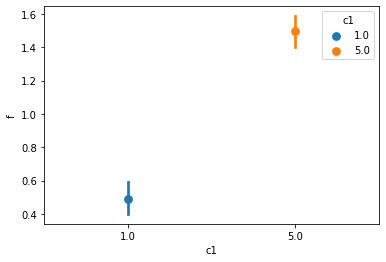

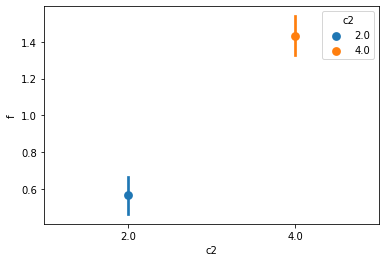

In [25]:
import seaborn as sns
_ = sns.pointplot(x="c1", y="f", data=data, hue='c1')
plt.show()
_ = sns.pointplot(x="c2", y="f", data=data, hue='c2')

#### 2) Проверить с использованием двухфакторного дисперсионного анализа, влияет ли переменная C2 на переменную f в данной линейной модели? 

In [26]:
lm = ols('f ~ c1 * c2',data=data).fit()
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
c1,1.0,251.197774,251.197774,248.338479,4.024227e-50
c2,1.0,188.713969,188.713969,186.565906,4.650817e-39
c1:c2,1.0,0.005511,0.005511,0.005448,9.411750e-01
Residual,996.0,1007.467644,1.011514,NaN,NaN


#### 3) Проверить с использованием двухфакторного дисперсионного анализа, влияет ли межфакторное взаимодействие на переменную f в данной линейной модели?

In [27]:
lm = ols('f ~  c1 + c2 + c1:c2',  data=data).fit()

In [28]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      f   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     145.0
Date:                Wed, 01 Apr 2020   Prob (F-statistic):           6.05e-78
Time:                        23:18:35   Log-Likelihood:                -1422.7
No. Observations:                1000   AIC:                             2853.
Df Residuals:                     996   BIC:                             2873.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0493      0.181     -5.782      0.000      -1.405      -0.693
c1             0.2475      0.050      4.934      0.000       0.149       0.346
c2             0.4309      0.057      7.494      0.000       0.318       0.544
c1:c2          0.0012      0.016      0.074      0.941      -0.030       0.032
==============================================================================
Omnibus:                        2.423   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.298   Jarque-Bera (JB):                2.463
Skew:                           0.119   Prob(JB):                        0.292
Kurtosis:                       2.948   Cond. No.                         74.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""